# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
# Downloading the WeRateDogs Twitter archive data
import pandas as pd
twitter_df= pd.read_csv('twitter-archive-enhanced-2.csv')

In [2]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Downloading the (tweet image prediction) image predictions tsv file using the Requests library
import requests
import os

In [4]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'       
response= requests.get(url)
response

<Response [200]>

In [5]:
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
imagepre_df= pd.read_csv('image-predictions.tsv', sep='\t')
imagepre_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# getting the tweet json text file to be used
import json

tweets_list= []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        tweets_list.append({'tweets': tweets,
                            'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})
        tweets_df = pd.DataFrame(tweets_list)
        

In [8]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id,tweets
0,39467,8853,892420643555336193,{'created_at': 'Tue Aug 01 16:23:56 +0000 2017...
1,33819,6514,892177421306343426,{'created_at': 'Tue Aug 01 00:17:27 +0000 2017...
2,25461,4328,891815181378084864,{'created_at': 'Mon Jul 31 00:18:03 +0000 2017...
3,42908,8964,891689557279858688,{'created_at': 'Sun Jul 30 15:58:51 +0000 2017...
4,41048,9774,891327558926688256,{'created_at': 'Sat Jul 29 16:00:24 +0000 2017...


## Assessing Data


In [9]:
# Assessing the twitter archive data
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_df.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
5,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
6,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
7,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
8,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
9,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [12]:
twitter_df[twitter_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [13]:
# check for the counts of the different names in the `name` column
twitter_df.name.value_counts().head(100)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
Daisy         7
an            7
Buddy         7
Toby          7
Oscar         6
Jax           6
Dave          6
Bella         6
Milo          6
Rusty         6
Leo           6
Scout         6
Jack          6
Stanley       6
Koda          6
Sammy         5
           ... 
Archie        4
Walter        4
Jerry         4
Sophie        4
Chip          4
Derek         4
Bear          4
Clarence      4
Jeffrey       4
Riley         4
Mia           3
Olive         3
Vincent       3
Louie         3
Arnie         3
Wallace       3
Lorenzo       3
Rory          3
Paisley       3
Zeke          3
Doug          3
Peaches       3
Steven        3
Otis          3
Frankie       3
Colby         3
Samson        3
Rosie         3
Wyatt         3
Calvin        3
Name: name, Length: 100,

**From here, it looks like some dogs have no name ('None'), others, invalid dog names e.g such, a, an etc... and they begin with lowercases.**

In [14]:
# list all names that begin with lowercases
invalid_names_mask = twitter_df.name.str.contains('^[a-z]', regex = True)
twitter_df[invalid_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [15]:
len(twitter_df[invalid_names_mask])

109

In [16]:
twitter_df.source.sample(5)

1882    <a href="http://twitter.com/download/iphone" r...
1411    <a href="http://twitter.com/download/iphone" r...
1919    <a href="http://twitter.com/download/iphone" r...
1960    <a href="http://twitter.com/download/iphone" r...
1634    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

**Looks like, the tweet's source in the `source` column are mixed up with HTML codes and urls.**

In [17]:
# check for rating_denominator gretaer than 10
twitter_df.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

**We can say rating denominator for this project is a quality issue because we are analyzing with rating denominators of 10.**

In [18]:
# image predictions data
imagepre_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
imagepre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
imagepre_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
imagepre_df.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
#twitter json file
tweets_df

,favorite_count,retweet_count,tweet_id,tweets
0,39467,8853,892420643555336193,{'created_at': 'Tue Aug 01 16:23:56 +0000 2017...
1,33819,6514,892177421306343426,{'created_at': 'Tue Aug 01 00:17:27 +0000 2017...
2,25461,4328,891815181378084864,{'created_at': 'Mon Jul 31 00:18:03 +0000 2017...
3,42908,8964,891689557279858688,{'created_at': 'Sun Jul 30 15:58:51 +0000 2017...
4,41048,9774,891327558926688256,{'created_at': 'Sat Jul 29 16:00:24 +0000 2017...
5,20562,3261,891087950875897856,{'created_at': 'Sat Jul 29 00:08:17 +0000 2017...
6,12041,2158,890971913173991426,{'created_at': 'Fri Jul 28 16:27:12 +0000 2017...
7,56848,16716,890729181411237888,{'created_at': 'Fri Jul 28 00:22:40 +0000 2017...
8,28226,4429,890609185150312448,{'created_at': 'Thu Jul 27 16:25:51 +0000 2017...
9,32467,7711,890240255349198849,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...


In [23]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
tweets            2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [24]:
tweets_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [25]:
sum(imagepre_df.duplicated())

0

In [26]:
# Checking for duplicated columns by creating a list of every column in every dataset
all_columns = pd.Series(list(twitter_df) + list(imagepre_df) + list(tweets_df))
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

### Quality issues
 `twitter_df`table;
 
1. Missing urls in `expanded_urls` column.

2. Other columns with missing values that can not be fixed(`in_reply_to_status_id`, `in_reply_to_user_id`) and also does not    apply to original tweets.

3. Retweet columns which are not required for this analysis (Original ratings are required).

4. Wrong Datatypes( timestamp which is stored as an 'object' ).

5. Dogs with invalid names have weird names and begins with lowercases (such, a, an, the...) in `name` column.

6. The tweet's source in the `source` column is mixed up with html codes and urls.

7. Some rating denominators are greater than 10.

`imagepre_df` table;

8. Some of the predictions in columns p1, p2, p3 start with capital letters, others, small letters.

### Tidiness issues
1. All dog stages should be in one single column in the `twitter_df` table instead in 4 different columns.

2. `tweets_df` should be part of `twitter_df`.

## Cleaning Data


In [27]:
# Make copies of original pieces of data
twitter_df_clean= twitter_df.copy()
imagepre_df_clean= imagepre_df.copy()
tweets_df_clean= tweets_df.copy()

### Issue #1: Missing Data#1
- Missing urls in `expanded_urls` column.

#### Define: 
Since we can not fill in the missing urls, we would rather drop this column.

#### Code

In [28]:
twitter_df_clean.drop('expanded_urls', axis = 1, inplace = True)

#### Test

In [29]:
# to confirm if the expanded url column is gone
list(twitter_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #2:  Missing Data #2
- Other columns with missing values that can not be fixed(`in_reply_to_status_id`, `in_reply_to_user_id`) and also does not    apply to original tweets.


#### Define
These columns stated above do not apply to original tweets instead, they are replies and we don't necessarily need them for analysis, therefore, we would drop the columns too.

#### Code

In [30]:
twitter_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'] , axis = 1, inplace = True)

#### Test

In [31]:
list(twitter_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #3: Quality #1
- Retweet columns which are not required for this analysis (Original ratings are required).

#### Define
 Drop columns with retweets since we only want original ratings.

#### Code

In [32]:
twitter_df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'] , axis = 1, inplace = True)

#### Test

In [33]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


### Issue #4: Tidiness #1 
- All dog stages should be in one single column in the `twitter_df` table.

#### Define
Melt all the dog stages columns `doggo`, `floofer`, `pupper`, `puppo` columns into one main column named with `dog_stages`. Before melting, we will create a new column to identify those dogs with no identified dog stage as 'NaN'.

#### Code

In [34]:
def u(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'NaN'
    else:
        val ='None'
    return val

twitter_df_clean['NaN'] = twitter_df_clean.apply(u, axis=1)

In [35]:
twitter_df_clean = pd.melt(twitter_df_clean, id_vars =['tweet_id','timestamp', 'source', 'text'
                                                       , 'rating_numerator','rating_denominator', 'name'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'NaN'],
                     var_name = 'dog_stages', 
                    value_name = 'value')

In [36]:
# clean the duplicated rows created in the previous process and drop the 'value' variable
twitter_df_clean= twitter_df_clean[twitter_df_clean['value']!= 'None']
twitter_df_clean = twitter_df_clean.drop('value', axis=1)

#### Test

In [37]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 9 to 11779
Data columns (total 8 columns):
tweet_id              2370 non-null int64
timestamp             2370 non-null object
source                2370 non-null object
text                  2370 non-null object
rating_numerator      2370 non-null int64
rating_denominator    2370 non-null int64
name                  2370 non-null object
dog_stages            2370 non-null object
dtypes: int64(3), object(5)
memory usage: 166.6+ KB


In [38]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo
99,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,None,doggo
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo
110,871102520638267392,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo


In [39]:
twitter_df_clean.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages
11775,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN
11776,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN
11777,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,NaN
11778,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN
11779,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,NaN


### Issue #5 Tidiness #2
**`tweets_df` should be part of `twitter_df`.**

#### Define
Merge `tweets_df` with `twitter_df`

#### Code

In [40]:
twitter_df_clean= pd.merge(twitter_df_clean, tweets_df, on= ['tweet_id'], how='left')

#### Test

In [41]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,tweets
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,32467.0,7711.0,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...
1,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,20771.0,3128.0,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...
2,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,None,doggo,28031.0,5669.0,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...
3,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,20730.0,3628.0,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...
4,871102520638267392,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo,21461.0,5764.0,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...


### Issue #6:  Quality #2
- Some of the predictions in columns p1, p2, p3 start with capital letters, others, small letters.

#### Define
 Convert the names that start with capital letters to small letters. 

#### Code

In [42]:
imagepre_df_clean.p1 = imagepre_df_clean.p1.str.lower()
imagepre_df_clean.p2 = imagepre_df_clean.p2.str.lower()
imagepre_df_clean.p3 = imagepre_df_clean.p3.str.lower()

In [43]:
imagepre_df_clean['p1'].str.replace("_", " " )

0            welsh springer spaniel
1                           redbone
2                   german shepherd
3               rhodesian ridgeback
4                miniature pinscher
5              bernese mountain dog
6                        box turtle
7                              chow
8                     shopping cart
9                  miniature poodle
10                 golden retriever
11                    gordon setter
12                     walker hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english setter
17                              hen
18                 desktop computer
19                italian greyhound
20                      maltese dog
21                 three-toed sloth
22                               ox
23                 golden retriever
24                         malamute
25                       guinea pig
26      soft-coated wheaten terrier
27                        ch

In [44]:
imagepre_df_clean['p2'].str.replace("_", " " )

0                         collie
1             miniature pinscher
2                       malinois
3                        redbone
4                     rottweiler
5               english springer
6                     mud turtle
7                tibetan mastiff
8                shopping basket
9                       komondor
10               tibetan mastiff
11             yorkshire terrier
12              english foxhound
13                  bull mastiff
14               german shepherd
15                      shih-tzu
16                  newfoundland
17                          cock
18                          desk
19                   toy terrier
20                    toy poodle
21                         otter
22                  newfoundland
23      chesapeake bay retriever
24                siberian husky
25                         skunk
26                  afghan hound
27                   toy terrier
28                    bloodhound
29                    barracouta
          

In [45]:
imagepre_df_clean['p3'].str.replace("_", " " )

0                 shetland sheepdog
1               rhodesian ridgeback
2                        bloodhound
3                miniature pinscher
4                          doberman
5        greater swiss mountain dog
6                          terrapin
7                          fur coat
8                  golden retriever
9       soft-coated wheaten terrier
10               labrador retriever
11                         pekinese
12                     ibizan hound
13                   french bulldog
14                         malinois
15                   dandie dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature poodle
21                   great grey owl
22                      groenendael
23               labrador retriever
24                       eskimo dog
25                          hamster
26                           briard
27                         p

#### Test

In [46]:
imagepre_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #7:  Quality #3
- Wrong Datatypes( timestamp which is stored as an 'object' ).

#### Define
Convert the datatype of the timestamp column from 'object' to 'datetime'.

#### Code

In [47]:
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean.timestamp)

#### Test

In [48]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 11 columns):
tweet_id              2370 non-null int64
timestamp             2370 non-null datetime64[ns]
source                2370 non-null object
text                  2370 non-null object
rating_numerator      2370 non-null int64
rating_denominator    2370 non-null int64
name                  2370 non-null object
dog_stages            2370 non-null object
favorite_count        2368 non-null float64
retweet_count         2368 non-null float64
tweets                2368 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 222.2+ KB


### Issue #8:  Quality #4
- Dogs with invalid names have weird names and begins with lowercases (such, a, an, the...) in `name` column.

#### Define
Replace the invalid names in the `name` column with 'None'.

#### Code

In [49]:
invalid_names_mask = twitter_df_clean.name.str.contains('^[a-z]', regex = True)
twitter_df_clean[invalid_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             6
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [50]:
twitter_df_clean.loc[invalid_names_mask, 'name'] = "None"

#### Test

In [51]:
# To confirm if the names have been changed to "None"
twitter_df_clean[invalid_names_mask].name.value_counts().sort_index()

None    111
Name: name, dtype: int64

In [52]:
twitter_df_clean.name.value_counts()

None         864
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
Daisy          7
Bailey         7
Buddy          7
Toby           7
Milo           6
Koda           6
Bella          6
Dave           6
Stanley        6
Rusty          6
Scout          6
Leo            6
Jax            6
Jack           6
Oscar          6
Bentley        5
Maggie         5
Louis          5
Sunny          5
            ... 
Adele          1
Chuq           1
Dobby          1
Bayley         1
Major          1
Lenox          1
Clyde          1
Oddie          1
Scruffers      1
Pepper         1
Baron          1
Samsom         1
Kenzie         1
Derby          1
Taz            1
Vinnie         1
Brutus         1
Theo           1
Apollo         1
Newt           1
Schnozz        1
Eevee          1
Blue           1
Divine         1
Crouton        1
Rumble         1
Brat           1
Blipson       

### Issue #9:  Quality #5
- The tweet's source in the `source` column is mixed up with html codes and urls.

#### Define
Extract the string (i.e. tweet's source) in between `<a href = "">` and `</a>`.

#### Code

In [53]:
twitter_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2234
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          92
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [54]:
twitter_df_clean['source'] = twitter_df_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [55]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,tweets
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,32467.0,7711.0,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,20771.0,3128.0,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12,10,None,doggo,28031.0,5669.0,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,20730.0,3628.0,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...
4,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo,21461.0,5764.0,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...


In [56]:
twitter_df_clean.source.value_counts()

Twitter for iPhone     2234
Vine - Make a Scene      92
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #10:  Quality #6
- Some rating denominators are greater than 10

#### Define
Drop tweets with `rating_denominator` NOT equal to 10.

#### Code

In [57]:
twitter_df_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2347
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [58]:
twitter_df_clean= twitter_df_clean[twitter_df_clean.rating_denominator == 10]

#### Test

In [59]:
twitter_df_clean.rating_denominator.value_counts().sort_index(ascending= False)

10    2347
Name: rating_denominator, dtype: int64

## Storing Data

In [60]:
# save the gathered , assessed and cleaned master dataset to a csv file
# named "twitter_archive_master.csv"
twitter_df_clean.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
df= pd.read_csv('twitter_archive_master.csv')

In [62]:
df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,tweets
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,32467.0,7711.0,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,20771.0,3128.0,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12,10,None,doggo,28031.0,5669.0,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,20730.0,3628.0,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...
4,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo,21461.0,5764.0,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...
5,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,16476.0,3327.0,{'created_at': 'Tue May 30 16:49:31 +0000 2017...
6,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,13,10,None,doggo,16304.0,3771.0,{'created_at': 'Mon May 01 00:40:27 +0000 2017...
7,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13,10,None,doggo,47844.0,19196.0,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...
8,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",11,10,None,doggo,17169.0,3433.0,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...
9,851953902622658560,2017-04-12 00:23:33,Twitter for iPhone,RT @dog_rates: This is Astrid. She's a guide d...,13,10,Astrid,doggo,0.0,10706.0,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 11 columns):
tweet_id              2347 non-null int64
timestamp             2347 non-null object
source                2347 non-null object
text                  2347 non-null object
rating_numerator      2347 non-null int64
rating_denominator    2347 non-null int64
name                  2347 non-null object
dog_stages            394 non-null object
favorite_count        2345 non-null float64
retweet_count         2345 non-null float64
tweets                2345 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 201.8+ KB


In [64]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.347000e+03,2347.000000,2347.0,2345.000000,2345.000000
mean,7.431992e+17,12.232211,10.0,8141.895522,3189.313433
std,6.863351e+16,40.900209,0.0,11873.823039,5309.440551
min,6.660209e+17,0.000000,10.0,0.000000,0.000000
25%,6.784049e+17,10.000000,10.0,1415.000000,631.000000
50%,7.210012e+17,11.000000,10.0,3627.000000,1489.000000
75%,8.000798e+17,12.000000,10.0,10192.000000,3652.000000
max,8.924206e+17,1776.000000,10.0,132810.000000,79515.000000


**In order to get insights, let's ask the data some questions.**

### Questions
1. Which of the dog stages is the most popular?

2. What dog stage got the highest favorite count excluding the ones with no identified dog stage?

3. What is the relationship between favorite count and retweet count? 

- **Which of the dog stages is the most popular?**

In [65]:
dogstage_df= df.dog_stages.value_counts().sort_index(ascending = True)

In [66]:
dogstage_df

doggo       97
floofer     10
pupper     257
puppo       30
Name: dog_stages, dtype: int64

**From the above, it shows that the most popular dog stage is the pupper.**

- **What is the relationship between favorite count and retweet count?**

In [67]:
df.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter');

**This shows that there is a positive correlation between the number of likes (favorite_count) and the number of retweets(retweet_count).**

### Insights:
1. The most popular dog stage is the **pupper** with a value count of '257', followed by **doggo** with a value count of '97', then **puppo** with a value count of '30' and finally **floofer** with a value count of '10'.
2. According to our plot/visualization, `pupper` has the highest favorite count, followed by `doggo`, then puppo and lastly `floofer`.
3. There is a strong correlation between the favorite count and the retweet count. The higher the number of likes, the higher the number of retweets.

### Visualizations

In [68]:
# import necessary libraries to be used
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### Question 1. Which of the dog stages is the most popular?

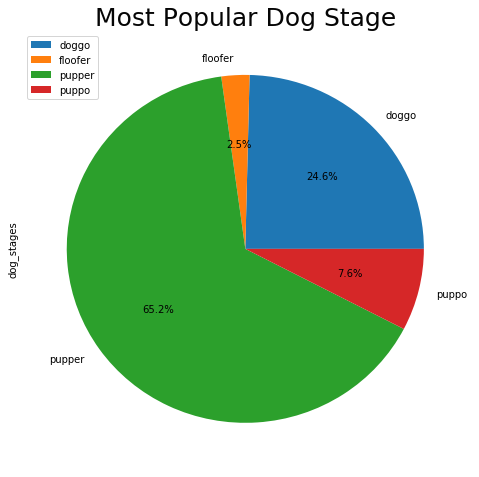

In [69]:
dogstage_df.plot.pie(y = 0, figsize= (8,8), autopct= '%1.1f%%');
plt.title ('Most Popular Dog Stage', fontsize= 25, alpha= 7);
plt.legend(loc=0);

### Question 2. What dog stage got the highest favorite count excluding the ones with no identified dog stage?

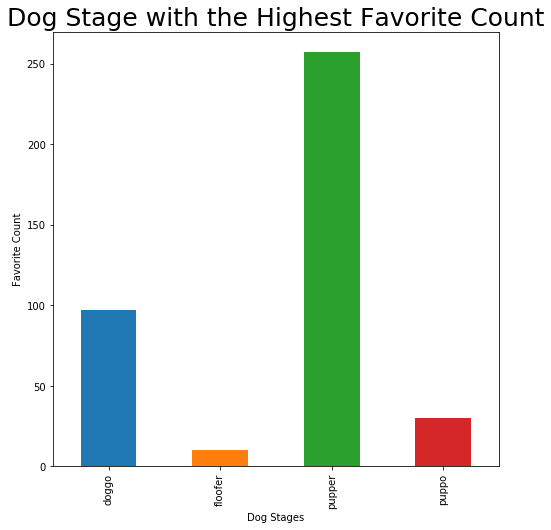

In [70]:
plt.figure(figsize= (8,8))
dogstage_df.plot.bar(x='dog_stages', y = 'favorite_count')
plt.xlabel('Dog Stages', fontsize = 10)
plt.ylabel('Favorite Count', fontsize = 10)
plt.title('Dog Stage with the Highest Favorite Count', fontsize = 25, alpha = 1);

### Question 3. What is the relationship between favorite count and retweet count?

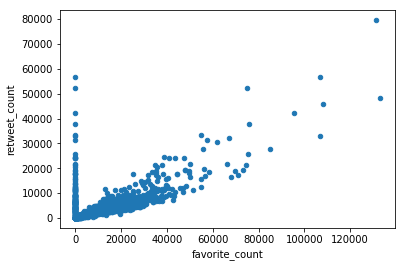

In [71]:
df.plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter');